<a href="https://colab.research.google.com/github/conjurer2306/Data-analysis-on-goodreads-books-dataset/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyze Kaggle Goodreads-books dataset
1. Explore
2. Clean 
3. Feature Engineer the columns
4. Build a Linear Regression model
5. Evaluate the model
6. Predict test cases
7. Deploy a new test case

In [1]:
#importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#uploading the csv file as Pandas dataframe
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [5]:
#getting a look at the first 5 rows of the data
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


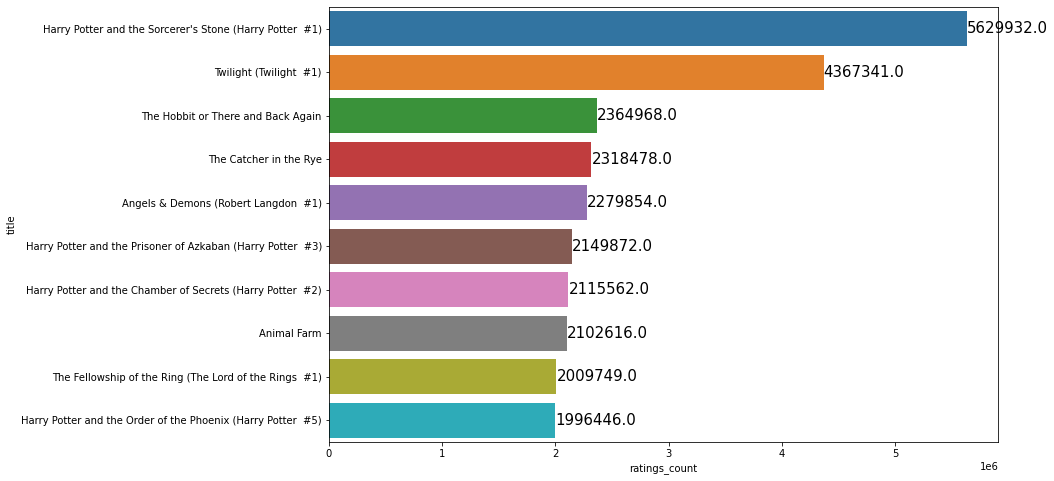

In [6]:
# checking out the Top 10 rated books
top10Books = df.nlargest(10, ['ratings_count']).set_index('title')['ratings_count']
plot_dims = (12, 8)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(top10Books, top10Books.index)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 15, color = 'k')
    
plt.show()

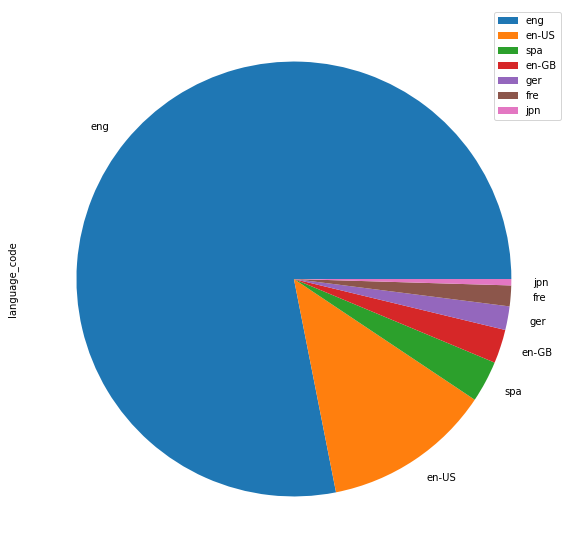

In [7]:
#Checking out Top 7 books categorized based on languages
df['language_code'].value_counts().head(7).plot(kind = 'pie', figsize=(10, 10)).legend()
plt.show()

In [8]:
df_index_ChosenLangs = df.loc[df['language_code'].isin(['eng','en-US', 'spa', 'fre'])] 
df_index_ChosenLangs.shape
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [9]:
#Splitting dataset into two parts based on ratings and languages
#Assuming high ratings as ratings >= 100,000 and 'ratings_count' - Drop ratings below 100, 000
High_Rating = 100000
df_HighRatedBooks = df_index_ChosenLangs.drop(df_index_ChosenLangs.index[df_index_ChosenLangs['ratings_count'] <= High_Rating])

In [10]:
df_HighRatedBooks.shape

(454, 10)

In [11]:
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [12]:
df_OtherBooks = df_index_ChosenLangs.drop(df_index_ChosenLangs.index[df_index_ChosenLangs['ratings_count'] > High_Rating])

In [13]:
df_OtherBooks.shape

(12467, 10)

In [14]:
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258


In [15]:
# encoding the Categorical variables for the two samples
# encode title column in df_HighRatedBooks
labelEncode = preprocessing.LabelEncoder()
df_HighRatedBooks['title'] = labelEncode.fit_transform(df_HighRatedBooks['title'])
df_OtherBooks['title'] = labelEncode.fit_transform(df_OtherBooks['title'])

In [16]:
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,136,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,137,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,139,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,138,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,401,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [17]:
# encoding samples in df_OtherBooks
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,3379,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,3373,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,10820,W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,3375,J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,10187,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258


In [18]:
# encode authors column in df_HighRatedBooks
df_HighRatedBooks['authors'] = labelEncode.fit_transform(df_HighRatedBooks['authors'])
df_HighRatedBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,136,119,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,137,119,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,139,119,4.47,0439554934,9780439554930,eng,320,5629932,70390
4,5,138,119,4.55,043965548X,9780439655484,eng,435,2149872,33964
9,13,401,67,4.38,0345453743,9780345453747,eng,815,240189,3954


#### Encoding samples in df_OtherBooks

In [19]:
# encoding samples in df_OtherBooks
df_OtherBooks['authors'] = labelEncode.fit_transform(df_OtherBooks['authors'])
df_OtherBooks.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
3,4,3379,2842,4.41,0439554896,9780439554893,eng,352,6267,272
5,8,3373,2845,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,10820,6814,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,3375,2842,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,10187,1582,4.38,0517226952,9780517226957,eng,815,3602,258


In [20]:
#df_OtherBooks = df_OtherBooks.loc[df['language_code'].isin(['eng','en-US', 'spa', 'fre'])] 

In [21]:
# dummy encode the 'language_code'
# encoding samples in df_HighRatedBooks
encoded_lang_high = pd.get_dummies(df_HighRatedBooks['language_code'])
colsExist2 = df_HighRatedBooks.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  colsExist2 == False:
    df_HighRatedBooks = pd.concat([df_HighRatedBooks, encoded_lang_high], axis = 1)
print(df_HighRatedBooks.shape)
df_HighRatedBooks.head()

(454, 14)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
0,1,136,119,4.56,0439785960,9780439785969,eng,652,1944099,26249,0,1,0,0
1,2,137,119,4.49,0439358078,9780439358071,eng,870,1996446,27613,0,1,0,0
2,3,139,119,4.47,0439554934,9780439554930,eng,320,5629932,70390,0,1,0,0
4,5,138,119,4.55,043965548X,9780439655484,eng,435,2149872,33964,0,1,0,0
9,13,401,67,4.38,0345453743,9780345453747,eng,815,240189,3954,0,1,0,0


In [22]:
# encoding samples in df_OtherBooks
encoded_lang_other = pd.get_dummies(df_OtherBooks['language_code'])
encoded_lang_other.head()
colsExist = df_OtherBooks.columns.isin(['en-US', 'eng', 'fre', 'spa']).any()
if  colsExist == False:
    df_OtherBooks = pd.concat([df_OtherBooks, encoded_lang_other], axis = 1)
print(df_OtherBooks.shape)
df_OtherBooks.head()

(12467, 14)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
3,4,3379,2842,4.41,0439554896,9780439554893,eng,352,6267,272,0,1,0,0
5,8,3373,2845,4.78,0439682584,9780439682589,eng,2690,38872,154,0,1,0,0
6,9,10820,6814,3.69,0976540606,9780976540601,en-US,152,18,1,1,0,0,0
7,10,3375,2842,4.73,0439827604,9780439827607,eng,3342,27410,820,0,1,0,0
8,12,10187,1582,4.38,0517226952,9780517226957,eng,815,3602,258,0,1,0,0


In [24]:
# building a Linear Regression Model
def ModelBuilding_LinearRegression(df_Current, testSize=0.2):
    # divide the data into attributes and labels
    X = df_Current.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
    y = df_Current['average_rating']
    print("Shape of Inputs = {0}".format(X.shape))
    print("Shape of Target = {0}".format(y.shape))
    # split 80% of the data to the training set and 20% of the data to test set 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = 999)
    linReg = LinearRegression()
    linReg.fit(X_train, y_train)
    print("Intercept = {0}".format(linReg.intercept_))
    print("Coefficients = {0}".format(linReg.coef_.tolist()))
    predictions = linReg.predict(X_test)
    return (predictions, X_test, y_test, linReg)

In [25]:
# model Intercept, coefficients and "average_rating" predictions for Highly rated books
Pedicted_Scores, X_test, y_test, linReg = ModelBuilding_LinearRegression(df_HighRatedBooks)

Shape of Inputs = (454, 11)
Shape of Target = (454,)
Intercept = -23.82269314075994
Coefficients = [1.2167641836840476e-06, -7.105512967541573e-05, -0.000278707743371055, 2.8311522099139577e-12, 0.00019539858327324644, 5.7984528226895623e-08, -1.3905380466673775e-06, 0.10478836561401028, 0.11056485334229402, -0.13248573914300715, -0.08286747981329659]


In [27]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': Pedicted_Scores.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,3.96,4.033805,-0.073805
1,3.99,3.990838,-0.000838
2,4.00,3.945433,0.054567
3,4.24,4.012508,0.227492
4,3.96,3.978972,-0.018972
5,4.03,3.993076,0.036924
6,4.15,4.049198,0.100802
7,3.97,4.018045,-0.048045
8,4.06,3.949395,0.110605
9,3.70,3.982329,-0.282329


In [28]:
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))
print('Mean Absolute Error (MAE):', np.sum(abs(Actual_Predicted['diff']))/Actual_Predicted.shape[0])

Mean Absolute Error (MAE): 0.170027298020585
Mean Squared Error (MSE): 0.04685604930505388
Root Mean Squared Error (RMSE): 0.21646258176658126
Mean Absolute Error (MAE): 0.170027298020585


In [29]:
X_test.head()

,bookID,title,authors,isbn13,# num_pages,ratings_count,text_reviews_count,en-US,eng,fre,spa
9581,30868,282,27,9780812474947,232,117003,5141,0,1,0,0
12250,41899,105,223,9780439321600,128,240268,5219,0,1,0,0
2222,6689,157,249,9780375814242,146,309497,4481,0,1,0,0
2684,8127,46,181,9780451528827,320,583568,12837,0,1,0,0
1165,3478,195,225,9780446676076,342,197377,3431,0,1,0,0


In [30]:
# testing mock case
Mocked_Case = np.array([33333, 888, 27, 9780812474947, 232, 117003, 5141, 0, 1, 0, 0])

In [31]:
Score_Mocked_Case = linReg.predict(Mocked_Case.reshape(1, -1))

In [32]:
Predictions = pd.DataFrame({'Observed': y_test.iloc[0], 'Predicted': Score_Mocked_Case})
Predictions

,Observed,Predicted
0,3.96,3.993745


In [33]:
X2 = df_OtherBooks.drop(['average_rating', 'language_code', 'isbn'], axis = 1)
y2 = df_OtherBooks['average_rating']
print(X2.shape)
print(y2.shape)

(12467, 11)
(12467,)


In [34]:
Scores2 = linReg.predict(X2)

In [35]:
DeployedModelPredictions = pd.DataFrame({'Observed': y2.tolist(), 'Predicted': Scores2.tolist()})
DeployedModelPredictions['diff'] = DeployedModelPredictions['Observed'] - DeployedModelPredictions['Predicted']
DeployedModelPredictions.head(10)

,Observed,Predicted,diff
0,4.41,3.014372,1.395628
1,4.78,3.472864,1.307136
2,3.69,1.335309,2.354691
3,4.73,3.599370,1.130630
4,4.38,2.972365,1.407635
5,4.22,2.964404,1.255596
6,4.22,2.920613,1.299387
7,4.38,2.966712,1.413288
8,3.43,3.727401,-0.297401
9,3.88,3.748680,0.131320


In [36]:
# model built for df_HighRatedBooks performs worse on df_OtherBooks with a Mean Absolute Error (MAE) 1.3479
print('Mean Absolute Error (MAE):', np.sum(abs(DeployedModelPredictions['diff']))/DeployedModelPredictions.shape[0])

Mean Absolute Error (MAE): 1.347939982175012


In [37]:
# model Intercept, coefficients and "average_rating" predictions for Other books not highly rated (i.e. with ratings < 100,000)
Pedicted_Scores, X_test, y_test, linReg = ModelBuilding_LinearRegression(df_OtherBooks)

Shape of Inputs = (12467, 11)
Shape of Target = (12467,)
Intercept = 3.858845884761504
Coefficients = [-9.109819086162846e-07, 1.464280513948941e-06, 1.0441401818176285e-06, 7.208193206410156e-16, 0.00022798845634429692, 3.769067319315255e-06, -7.28546937594143e-05, -0.016066264062233226, -0.013023909263107179, 0.04162899380999344, -0.012538820484652753]


In [38]:
Actual_Predicted = pd.DataFrame({'Observed': y_test.tolist(), 'Predicted': Pedicted_Scores.tolist()})
Actual_Predicted['diff'] = Actual_Predicted['Observed'] - Actual_Predicted['Predicted']
Actual_Predicted.head(10)

,Observed,Predicted,diff
0,4.29,3.883288,0.406712
1,4.23,3.819300,0.410700
2,3.27,3.954950,-0.684950
3,3.99,3.919310,0.070690
4,3.83,3.922710,-0.092710
5,3.66,3.913309,-0.253309
6,3.64,3.914832,-0.274832
7,3.74,3.918488,-0.178488
8,4.06,3.823783,0.236217
9,3.92,3.896491,0.023509


In [39]:
# second model performs way better with Root Mean Square Error (RMSE) at around 0.35 and Mean Absolute Error (MAE) around 0.23 for other books not rated high
# evaluate the performance of the algorithm
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, Pedicted_Scores))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, Pedicted_Scores))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, Pedicted_Scores)))

Mean Absolute Error (MAE): 0.2370365979855979
Mean Squared Error (MSE): 0.12525398412067856
Root Mean Squared Error (RMSE): 0.3539123961105044
